In [1]:

import duckdb
import plotly.express as px
from plotly_calplot import calplot

from common.entity import JOB_ONLINE
from common.env_variables import DUCKDB_DWH_FILE

In [2]:
conn = duckdb.connect(DUCKDB_DWH_FILE)

In [3]:
entity = JOB_ONLINE

In [4]:

df = conn.execute(f'''
SELECT *
FROM src_{entity.name}
WHERE
    year = 2022 AND
    month = 9 AND
    day = 1
;
''').df()

In [5]:

df = conn.execute(f'''
SELECT *
FROM count_job_online_by_date
;
''').df()

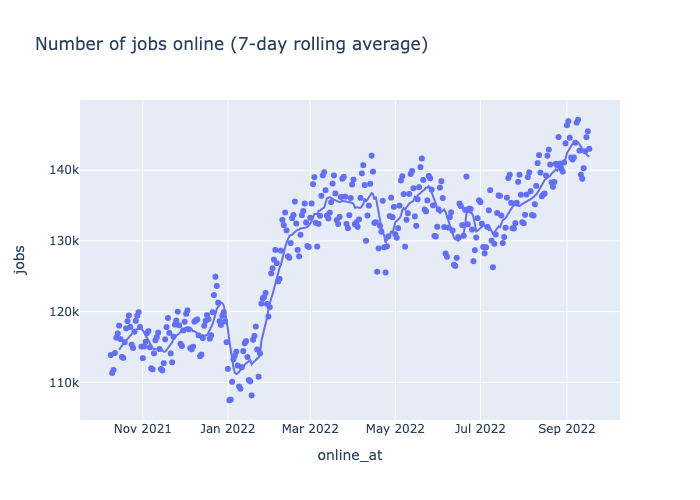

In [6]:
fig = px.scatter(df, x='online_at', y='jobs', trendline='rolling', trendline_options=dict(window=7),
                 title='Number of jobs online (7-day rolling average)')
fig.show('png')

In [7]:

df = conn.execute(f'''
SELECT *
FROM job_online_by_date_change
;
''').df()

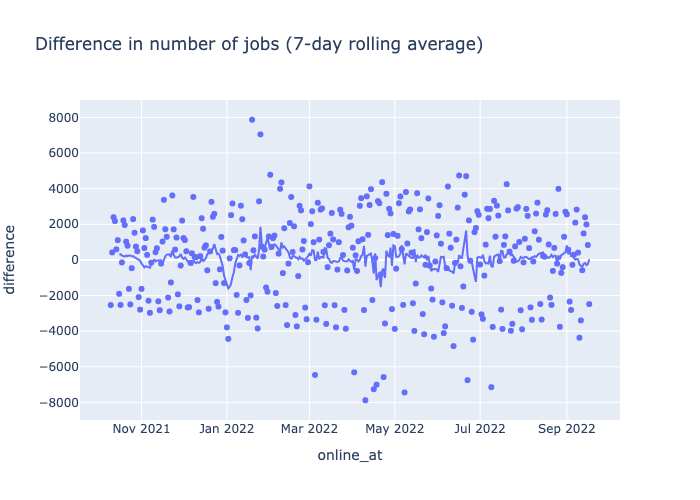

In [8]:

fig = px.scatter(df, x='online_at', y='difference', trendline='rolling', trendline_options=dict(window=7),
                 title='Difference in number of jobs (7-day rolling average)')
fig.show('png')

In [9]:
min_difference = df['difference'].min()
df['difference'] = df['difference'] - min_difference
print(df['difference'].min())

0


/Users/carrion/PycharmProjects/job-market-analytics/python/simplescraper/venv/lib/python3.10/site-packages/plotly_calplot/date_extractors.py:16: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/Users/carrion/PycharmProjects/job-market-analytics/python/simplescraper/venv/lib/python3.10/site-packages/plotly_calplot/date_extractors.py:16: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



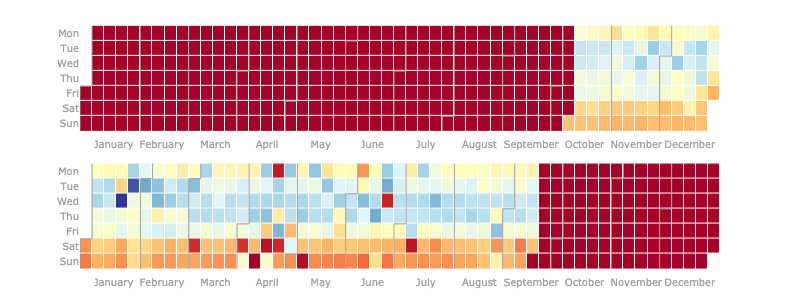

In [10]:

fig = calplot(
    df,
    x='online_at',
    y='difference',
    colorscale='RdYlBu'
)
fig.show('png')


In [11]:
df = conn.execute(f'''
SELECT * FROM top_location;
''').df()
print(df)

    location  count(job_id)
0     Berlin          95741
1    Hamburg          86727
2    München          83589
3  Stuttgart          43694
4       Köln          43109


In [12]:
df = conn.execute(f'''
SELECT * FROM top_company;
''').df()
print(df)

                                    company  count(job_id)
0                          Deutsche Bahn AG          13181
1                              Bosch Gruppe           8900
2  HAPEKO Hanseatisches Personalkontor GmbH           5704
3                              Bertrandt AG           5693
4                             meinestadt.de           5063


In [13]:
conn.close()